In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv("new_york_listings_2024.csv")

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [3]:
#get the number records and column name
num_records = len(df)
column_names = df.columns.tolist()
num_records, column_names

(20758,
 ['id',
  'name',
  'host_id',
  'host_name',
  'neighbourhood_group',
  'neighbourhood',
  'latitude',
  'longitude',
  'room_type',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'last_review',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365',
  'number_of_reviews_ltm',
  'license',
  'rating',
  'bedrooms',
  'beds',
  'baths'])

In [4]:
# get data_type of each column
data_type = df.dtypes
data_type

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [5]:
#check for missing values in each column
missing_values = df.isnull().sum()

In [6]:
# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

Series([], dtype: int64)

In [7]:
# Display the minimum and maximum prices
price_range = df['price'].agg(['min', 'max'])

price_range

min        10.0
max    100000.0
Name: price, dtype: float64

In [8]:
# Display the count of each room type
room_type_counts = df['room_type'].value_counts()

room_type_counts

Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: room_type, dtype: int64

In [9]:
# Calculate the average reviews per month
avg_reviews_per_month = df['reviews_per_month'].mean()

avg_reviews_per_month

1.2579097215531363

In [10]:
# Count the number of listings with a license
listings_with_license = df['license'].notnull().sum()

# Display the distribution of ratings
rating_distribution = df['rating'].value_counts()

listings_with_license, rating_distribution



(20758,
 No rating    3593
 5.0          2882
 4.67          517
 4.75          469
 4.80          439
              ... 
 4.02            1
 3.42            1
 3.73            1
 3.26            1
 2.75            1
 Name: rating, Length: 162, dtype: int64)

In [11]:
# Count the number of unique hosts and calculate the average listings per host
num_unique_hosts = df['host_id'].nunique()
avg_listings_per_host = df.groupby('host_id')['id'].count().mean()

num_unique_hosts, avg_listings_per_host


(12449, 1.6674431681259538)

Visualize the distribution of listings in each neighborhood group using a bar chart.

/tmp/ipykernel_23986/2049487686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='viridis')


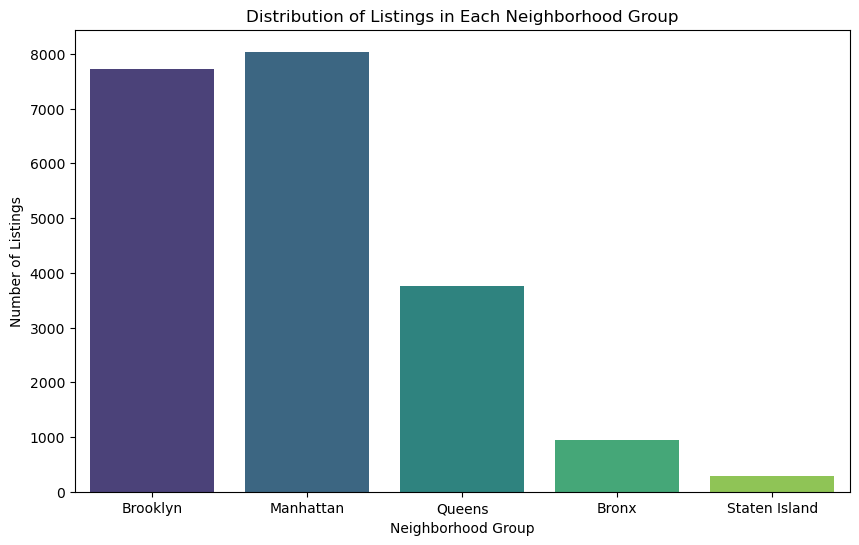

In [12]:
# Bar plot for distribution of listings in each neighborhood group
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df, palette='viridis')
plt.title('Distribution of Listings in Each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.show()

/tmp/ipykernel_23986/938564137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='muted')


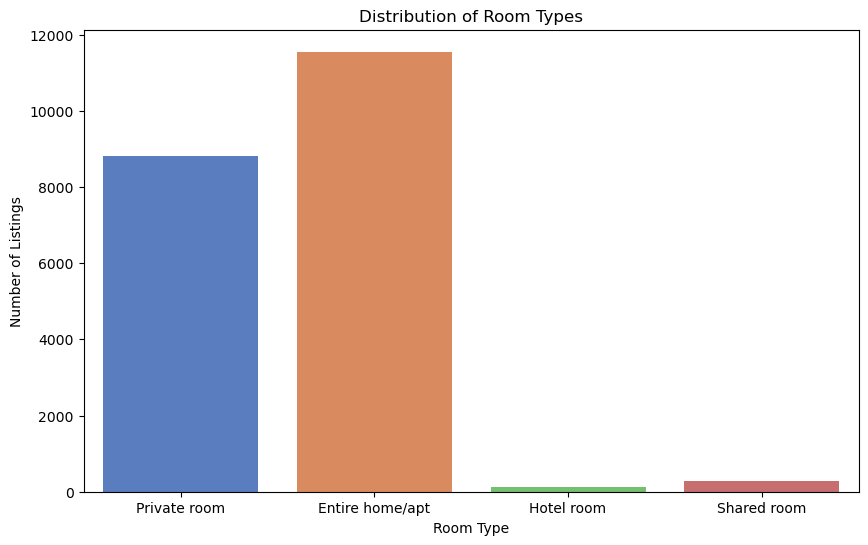

In [13]:
# Bar plot for distribution of room types
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='muted')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

/tmp/ipykernel_23986/3681947725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df, palette='pastel', errorbar=None)


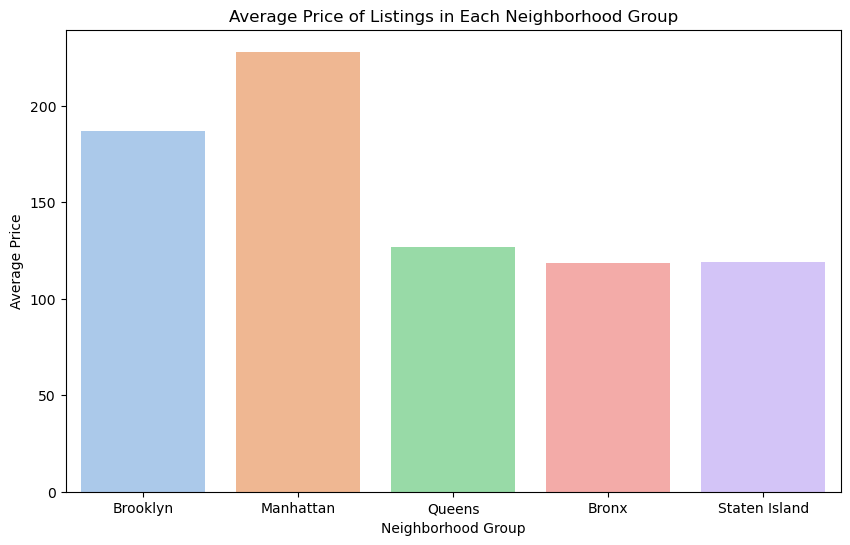

In [14]:
# Bar plot for average price of listings in each neighborhood group
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df, palette='pastel', errorbar=None)
plt.title('Average Price of Listings in Each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.show()



What is the distribution of the number of bedrooms in the listings?

/tmp/ipykernel_23986/2212302619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=df, palette='pastel')


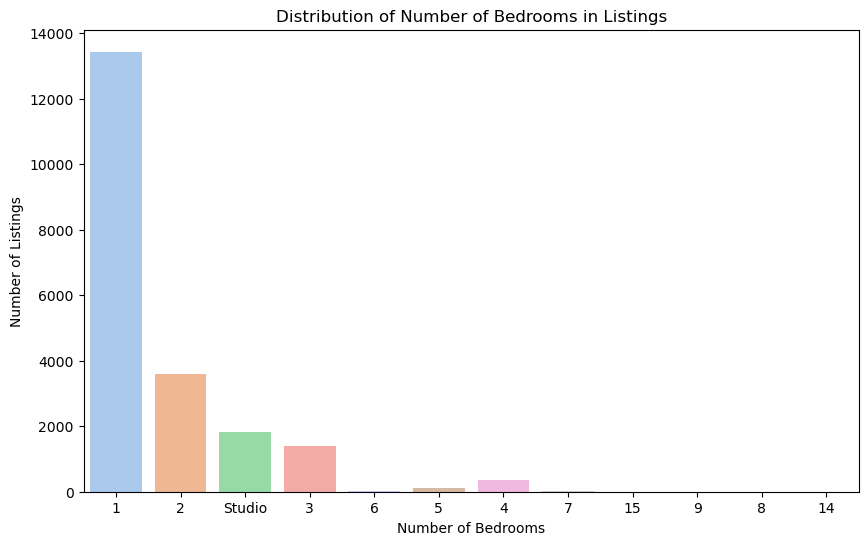

In [15]:
# Multi-colored plot for distribution of the number of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='pastel')
plt.title('Distribution of Number of Bedrooms in Listings')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Listings')
plt.show()



/tmp/ipykernel_23986/50515959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='beds', y='price', data=df, palette='husl', errorbar=None)


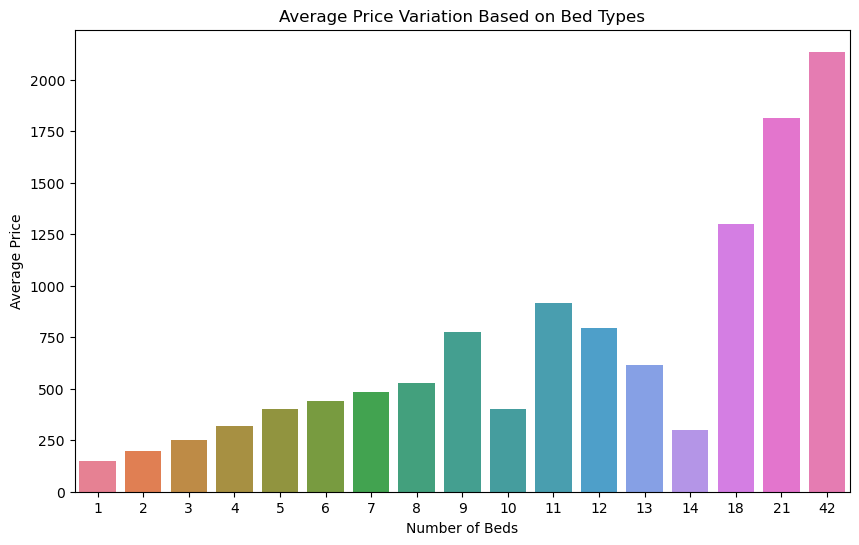

In [16]:
# Multi-colored plot for average price variation based on bed types
plt.figure(figsize=(10, 6))
sns.barplot(x='beds', y='price', data=df, palette='husl', errorbar=None)
plt.title('Average Price Variation Based on Bed Types')
plt.xlabel('Number of Beds')
plt.ylabel('Average Price')
plt.show()

How does the availability of listings vary based on the average rating they have received?

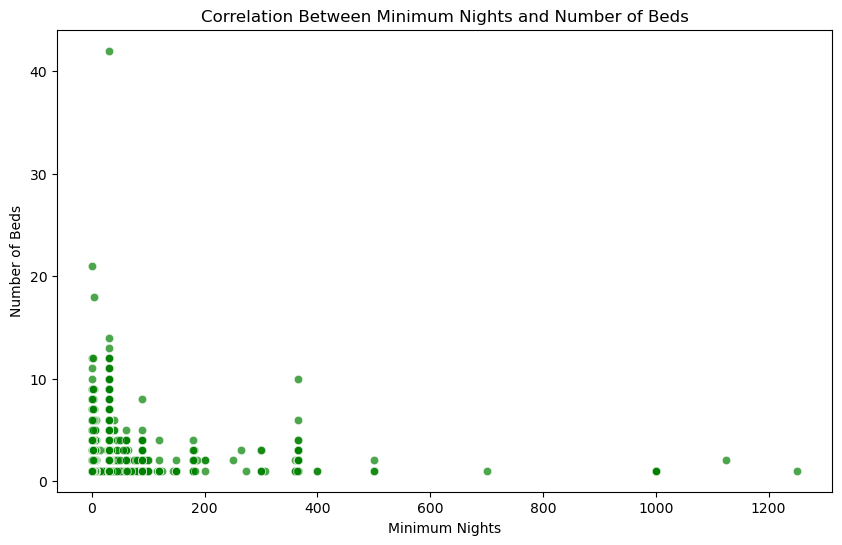

In [19]:
# Scatterplot for the correlation between minimum nights and number of beds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='beds', data=df, alpha=0.7, color='green')
plt.title('Correlation Between Minimum Nights and Number of Beds')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Beds')
plt.show()